In [1]:
# Imports
import numpy as np
import pandas as pd
import sklearn.metrics as skm
from statsmodels.tsa.vector_ar.var_model import VAR
import statsmodels.tsa.vector_ar.vecm
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
import openpyxl

In [2]:
# Define your path
path = "/Users/v.d Bosch/Documents/Github/GVAR_modelling/"

# Loading data

In [3]:
country_list = openpyxl.load_workbook(path + "Country_data.xlsx").sheetnames
df_country = pd.read_excel(path + "Country_data.xlsx",index_col=0, sheet_name=country_list)
country_list = np.array(country_list)

dom_variable_list = np.array(['y','Dp','eq','ep','r','lr'])
for_variable_list = np.array(['ys','Dps','eqs','eps','rs','lrs'])
variable_list = np.array(['y','Dp','eq','ep','r','lr','ys','Dps','eqs','eps','rs','lrs'])
ext_variable_list = np.array(['Real gross domestic product','Inflation rate','Real equity price index','Real exchange rate','Short-term interest rate','Long-term interest rate'])

df_dom = {}
df_for = {}

set_variables = pd.DataFrame(index=variable_list)

for country in country_list:
    df_country[country].index = pd.date_range('1979-04','2020', freq='Q')

    domestic_cols = [col for col in df_country[country].columns if not col.endswith("s")]
    df_dom[country] = df_country[country].loc[:,domestic_cols]
    
    foreign_cols = [col for col in df_country[country].columns if col.endswith("s")]
    df_for[country] = df_country[country].loc[:,foreign_cols]
    
    for variable in variable_list:
        if np.isin(variable, df_country[country].columns):
            set_variables.loc[variable,country] = True
        else:
            set_variables.loc[variable,country] = False

In [4]:
year_list = ['2014','2015','2016']
df_trade = pd.read_excel(path + "Trading_data.xlsx",index_col=0, sheet_name=year_list)

df_weights = (df_trade['2014'] + df_trade['2015'] + df_trade['2016'])/3
df_weights.fillna(0, inplace=True)
    
for country in country_list:
    df_weights.loc[country] = df_weights.loc[country] / (df_weights.loc[country].sum())

In [5]:
continent_list = ["North America","South America","Europe","Africa","Asia","Oceania"]
df_continent = pd.read_excel(path + "Continent_weights.xlsx",index_col=0, sheet_name=continent_list)

In [6]:
set_variables
set_variables.to_excel(path + "saved_values.xlsx")


In [7]:
# Potentially save this trade matrix
df_weights.to_excel(path + "saved_values.xlsx")

# Show the chosen trade matrix
df_weights

,Argentina,Australia,Austria,Belgium,Brazil,Canada,China,Chile,Finland,France,...,South Africa,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States
Argentina,0.000000,0.008665,0.002063,0.007553,0.265504,0.019327,0.167736,0.034908,0.002260,0.019450,...,0.009254,0.008480,0.002860,0.027472,0.003595,0.016839,0.015505,0.006432,0.014731,0.127333
Australia,0.002311,0.000000,0.003191,0.006511,0.003865,0.008153,0.316774,0.002678,0.001977,0.013372,...,0.004478,0.005235,0.038743,0.007230,0.005583,0.009138,0.041637,0.003134,0.026847,0.096530
Austria,0.001077,0.004666,0.000000,0.023828,0.003943,0.006292,0.039477,0.001176,0.004669,0.046809,...,0.003370,0.004741,0.002215,0.020448,0.013495,0.076398,0.003128,0.013682,0.032727,0.056016
Belgium,0.001380,0.004665,0.009805,0.000000,0.009555,0.008159,0.037591,0.001911,0.007168,0.155654,...,0.006535,0.006234,0.011449,0.027966,0.021245,0.016505,0.004056,0.014505,0.083659,0.083658
Brazil,0.083325,0.004864,0.003656,0.016222,0.000000,0.015844,0.228286,0.026367,0.003118,0.024419,...,0.006013,0.016003,0.011189,0.021386,0.005999,0.014832,0.011925,0.006638,0.020398,0.182179
Canada,0.002178,0.003611,0.002098,0.005405,0.005994,0.000000,0.085512,0.002731,0.001779,0.009769,...,0.001506,0.003504,0.002454,0.003732,0.002460,0.005817,0.003997,0.002522,0.025182,0.688913
China,0.005259,0.045174,0.003025,0.009534,0.029807,0.019124,0.000000,0.012846,0.002974,0.020563,...,0.016752,0.021652,0.030529,0.010953,0.005268,0.013094,0.029636,0.008466,0.030890,0.214996
Chile,0.031073,0.007480,0.002896,0.010668,0.077263,0.018019,0.283972,0.000000,0.003968,0.026821,...,0.001712,0.001863,0.001324,0.024979,0.004681,0.008171,0.009313,0.005000,0.011791,0.180274
Finland,0.001977,0.006114,0.013680,0.043957,0.009925,0.011597,0.056813,0.004494,0.000000,0.043882,...,0.005830,0.004492,0.003190,0.024368,0.184213,0.014717,0.003754,0.012743,0.057408,0.065657
France,0.001874,0.004305,0.012510,0.114731,0.009202,0.007205,0.056643,0.002033,0.004769,0.000000,...,0.003320,0.012125,0.009685,0.088556,0.014867,0.039569,0.004289,0.016234,0.070185,0.077206


# Plot variables

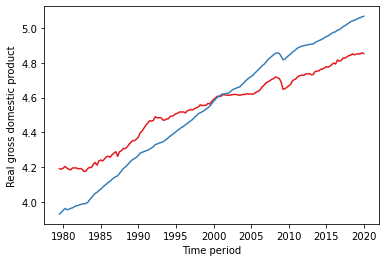

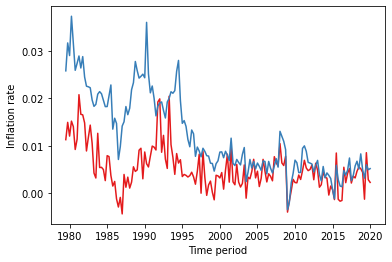

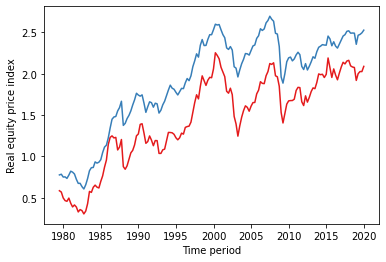

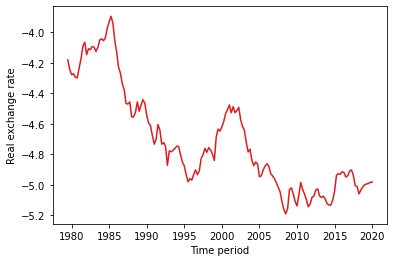

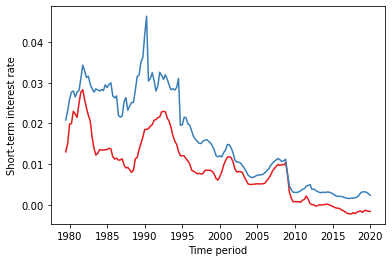

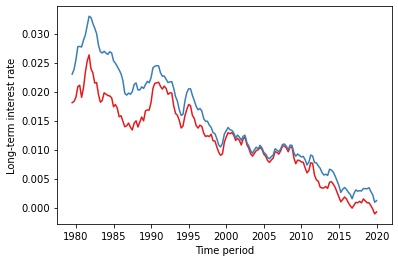

In [9]:
# Define a country
country = 'Germany'

sns.set_palette("Set1")

legend = False
# Plot x_it and x_star for every variable
for i in range(len(ext_variable_list)):
    if legend == False:
        if set_variables[country][variable_list[i]]:
            sns.lineplot(data=df_dom[country][variable_list[i]])
    
        if set_variables[country][variable_list[i]+"s"]:
            sns.lineplot(data=df_for[country][variable_list[i]+"s"])
    
        plt.xlabel("Time period")
        plt.ylabel(ext_variable_list[i])
        
        plt.show()
    else:
        
        fig, ax = plt.subplots()
        
        if set_variables[country][variable_list[i]]:
            sns.lineplot(data=df_dom[country][variable_list[i]],label='Domestic Variable')

        if set_variables[country][variable_list[i]+"s"]:
            sns.lineplot(data=df_for[country][variable_list[i]+"s"],label='Foreign Variable')

        
        plt.xlabel("Time period")
        plt.ylabel(ext_variable_list[i])
    
        pos = ax.get_position()
        ax.set_position([pos.x0, pos.y0, pos.width, pos.height])
        ax.legend(loc='upper right', bbox_to_anchor=(1.62, 1.21),prop={'size':14},ncol=2)

        plt.show()

# Test order of integration

In [10]:
# Define the DataFrames to fill the results in
adf_test_diff0 = pd.DataFrame(index=dom_variable_list)
adf_test_diff1 = pd.DataFrame(index=dom_variable_list)
adf_test_diff2 = pd.DataFrame(index=dom_variable_list)

# Loop over every country and variable
for country in country_list:
    for variable in dom_variable_list:
        if set_variables[country][variable]:
            # Take the data and its first and second difference
            non_dif = df_dom[country][variable]
            first_dif = np.diff(non_dif)
            second_dif = np.diff(first_dif)
        
            # Fill the DataFrames with the adf test statistics
            adf_test_diff0.loc[variable,country] = round(sm.tsa.stattools.adfuller(non_dif, autolag= 'AIC',regression='ct')[0],4)
            adf_test_diff1.loc[variable,country] = round(sm.tsa.stattools.adfuller(first_dif, autolag= 'AIC',regression='ct')[0],4)
            adf_test_diff2.loc[variable,country] = round(sm.tsa.stattools.adfuller(second_dif, autolag= 'AIC',regression='ct')[0],4)

In [11]:
# Potentially save these unit root test results
# adf_test_diff0.to_excel(path + "saved_values.xlsx")

# Show the results
# adf_test_diff0
# adf_test_diff1
adf_test_diff2

,Argentina,Australia,Austria,Belgium,Brazil,Canada,China,Chile,Finland,France,...,South Africa,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States
y,-6.9358,-7.1759,-6.8742,-7.5433,-7.0752,-7.8729,-5.7079,-7.9432,-6.6818,-5.7461,...,-6.6451,-7.0978,-6.8532,-16.0784,-5.7061,-7.0041,-6.6513,-8.7208,-6.5461,-7.5731
Dp,-8.6480,-6.8417,-7.9657,-6.8407,-6.1128,-6.6072,-7.5582,-6.3667,-7.3660,-7.0028,...,-8.1537,-7.5307,-6.6322,-7.3867,-8.1505,-7.3835,-7.5417,-6.3142,-6.6436,-7.3199
eq,-6.5096,-8.1777,-8.4956,-7.0065,NaN,-8.3971,NaN,-5.9537,-8.3783,-6.7786,...,-6.1850,NaN,-7.4686,-7.9413,-6.5018,-7.1914,-6.6324,NaN,-7.6161,-7.6137
ep,-7.3933,-8.9241,-6.4504,-6.6989,-7.5864,-9.8400,-8.2693,-7.3580,-6.1277,-6.2814,...,-5.9730,-4.2775,-8.9529,-5.6108,-6.8040,-8.1719,-6.6036,-7.1775,-9.3732,NaN
r,-9.7768,-7.4492,-6.6228,-4.9752,-7.7558,-7.4847,-6.0218,-6.7991,-7.3768,-8.1691,...,-7.3655,NaN,-7.1538,-6.5151,-6.6833,-4.6617,-5.8812,-6.6193,-6.5444,-6.2041
lr,NaN,-7.5484,-8.2109,-7.0578,NaN,-6.7963,NaN,NaN,NaN,-7.4212,...,-7.6254,NaN,NaN,-10.4645,-8.1694,-8.8482,NaN,NaN,-7.2879,-9.2054


# Useful other variables

In [11]:
dom_variables = np.array([])

for country in country_list:
    for variable in dom_variable_list:
        if set_variables[country][variable]:
            dom_variables = np.append(dom_variables,[str(variable)+"_"+str(country)])

for_variables = np.array([])

for country in country_list:
    for variable in for_variable_list:
        if set_variables[country][variable]:
            for_variables = np.append(for_variables,[str(variable)+"_"+str(country)])

k_i = {}
k_star = {}
k = 0

for country in country_list:
    k_i[country] = set_variables[country][dom_variable_list].sum()
    k_star[country] = set_variables[country][for_variable_list].sum()
    k += k_i[country]

# Determine lag order

In [12]:
max_lag = 4

for country in country_list:
    # Define the current lowest BIC value
    min_bic = 1000000
    
    # Loop over all possible combinations
    for lag_x_it in range(1,max_lag+1):
        for lag_x_star in range(1,max_lag+1):
    
            max_lag = max(lag_x_it,lag_x_star)
    
            x_it_star = pd.concat([df_dom[country],df_for[country]],axis=1)
    
            eigenvalues = statsmodels.tsa.vector_ar.vecm.coint_johansen(x_it_star,det_order=-1,k_ar_diff=max_lag-1).eig

            # Determine the rank of cointegration
            rank = np.sum(np.cumsum(eigenvalues) < 1)

            if (rank > k_i[country]):
                rank = k_i[country]

            coin_result = statsmodels.tsa.vector_ar.vecm.VECM(endog= df_dom[country][1:],exog=df_for[country].diff(1)[1:],exog_coint=df_for[country][1:],coint_rank=rank,k_ar_diff=max_lag-1).fit()
    
            # Initialize a dataframe with the x_star values of lag 0
            df_parameters = pd.concat([df_dom[country].shift(1),df_for[country].shift(1)], axis=1) @ np.vstack([coin_result.beta,coin_result.det_coef_coint])
            df_parameters.columns = ["_" + str(i) +"_coin" for i in range(coin_result.beta.shape[1])]

            # Initialize a dataframe with the x_star values of lag 0
            lagged_x_star = pd.concat([df_for[country].diff(1)],axis=1)
            lagged_x_star.columns += "_L0"
            df_parameters = pd.concat([df_parameters,lagged_x_star],axis=1)
            
            # Loop over all lag_x_it values to add the lagged values of x_it to df_parameters
            for lag in range(1,lag_x_it+1):
                if (lag <= lag_x_it-1):
                    lagged_x_it = df_dom[country].diff(1).shift(lag)
                    lagged_x_it.columns += "_dom_diff_L"+str(lag) 
                    df_parameters = pd.concat([df_parameters,lagged_x_it], axis=1)
            
            # Loop over all lag_x_star values to add the lagged values of x_star to df_parameters
            for lag in range(1,lag_x_star+1):
                if (lag <= lag_x_star-1):
                    lagged_x_star = df_for[country].diff(1).shift(lag)
                    lagged_x_star.columns += "_for_diff_L"+str(lag) 
                    df_parameters = pd.concat([df_parameters,lagged_x_star], axis=1)
        
            # Create and fit the model
            model = VAR(endog = df_dom[country].diff(1).iloc[max_lag:], exog = df_parameters.iloc[max_lag:])
            results = model.fit(maxlags=0,trend='ct',method='ols')
            
            # Update the lag and BIC value if the BIC value is smaller
            if (results.bic < min_bic):
                min_bic = results.bic
                best_lag_bic = (lag_x_it,lag_x_star)
            
    print("For",country)
    print("The lag order by BIC is",best_lag_bic)
    print("The BIC value is",min_bic)
    print("")
            

For Argentina
The lag order by BIC is (2, 1)
The BIC value is -24.129222056954735

For Australia
The lag order by BIC is (1, 1)
The BIC value is -57.94341868777388



KeyboardInterrupt: 

# Determining the cointegrating relationships

In [ ]:
for country in country_list:
    # Define the chosen lag
    lag_x_it = 2
    lag_x_star = 1
    max_lag = max(lag_x_it,lag_x_star)
    
    x_it_star = pd.concat([df_dom[country],df_for[country]],axis=1)
    
    eigenvalues = statsmodels.tsa.vector_ar.vecm.coint_johansen(x_it_star,det_order=-1,k_ar_diff=max_lag-1).eig

    # Determine the rank of cointegration
    rank = np.sum(np.cumsum(eigenvalues) < 1)

    if (rank > k_i[country]):
        rank = k_i[country]
        
    print("For",country)
    print("The amount of cointegrating relationships is",rank)
    print("")
            

# Using all Data

### Fit the VARX* models

In [13]:
df_estimates = {}
resid_dict = {}

for country in country_list:
    # Define the chosen lag
    lag_x_it = 2
    lag_x_star = 1
    max_lag = max(lag_x_it,lag_x_star)
    
    x_it_star = pd.concat([df_dom[country],df_for[country]],axis=1)
    
    eigenvalues = statsmodels.tsa.vector_ar.vecm.coint_johansen(x_it_star,det_order=-1,k_ar_diff=max_lag-1).eig

    # Determine the rank of cointegration
    rank = np.sum(np.cumsum(eigenvalues) < 1)

    if (rank > k_i[country]):
        rank = k_i[country]
            
    coin_result = statsmodels.tsa.vector_ar.vecm.VECM(endog= df_dom[country][1:],exog=df_for[country].diff(1)[1:],exog_coint=df_for[country][1:],coint_rank=rank,k_ar_diff=max_lag-1).fit()
    
    # Initialize a dataframe with the x_star values of lag 0
    df_parameters = pd.concat([df_dom[country].shift(1),df_for[country].shift(1)], axis=1) @ np.vstack([coin_result.beta,coin_result.det_coef_coint])
    df_parameters.columns = ["_" + str(i) +"_coin" for i in range(coin_result.beta.shape[1])]

    # Initialize a dataframe with the x_star values of lag 0
    lagged_x_star = pd.concat([df_for[country].diff()],axis=1)
    lagged_x_star.columns += "_L0"
    df_parameters = pd.concat([df_parameters,lagged_x_star],axis=1)
            
    # Loop over all lag_x_it values to add the lagged values of x_it to df_parameters
    for lag in range(1,lag_x_it+1):
        if (lag <= lag_x_it-1):
            lagged_x_it = df_dom[country].diff(1).shift(lag)
            lagged_x_it.columns += "_dom_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_it], axis=1)
            
    # Loop over all lag_x_star values to add the lagged values of x_star to df_parameters
    for lag in range(1,lag_x_star+1):
        if (lag <= lag_x_star-1):
            lagged_x_star = df_for[country].diff(1).shift(lag)
            lagged_x_star.columns += "_for_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_star], axis=1)
        
    
    # Create and fit the model
    model = VAR(endog = df_dom[country].diff(1).iloc[max_lag:], exog = df_parameters.iloc[max_lag:])
    results = model.fit(maxlags=0,trend='ct',method='ols')
        
    df_estimate =  results.params.T.loc[:,["const","trend"]]
    
    selected_cols = [col for col in results.params.T.columns if col.endswith("L0")]
    new_df = results.params.T.loc[:,selected_cols]
    new_df.columns = [str(variable) + "_L0" for variable in for_variable_list if set_variables[country][variable]]
    df_estimate = pd.concat([df_estimate,new_df],axis=1)
    
    
    selected_cols = [col for col in results.params.T.columns if col.endswith("L1")]
    new_df = results.params.T.loc[:,selected_cols]
    new_df.columns = [str(variable) + "_dom_L2" for variable in dom_variable_list if set_variables[country][variable]]
    df_estimate = pd.concat([df_estimate,-new_df],axis=1)
    
    
    selected_cols = [col for col in df_estimate.columns if col.endswith("_L0")]
    A_0 = np.hstack([np.eye(k_i[country]),-df_estimate.loc[:,selected_cols]])
    
    selected_cols = [col for col in df_estimate.columns if col.endswith("_L2")]
    A_2 = np.hstack([df_estimate.loc[:,selected_cols],np.zeros((k_i[country],k_star[country]))])
    
    selected_cols = [col for col in results.params.T.columns if col.endswith("coin")] 
    new_df = results.params.T.loc[:,selected_cols] @ np.vstack([coin_result.beta,coin_result.det_coef_coint]).T
    new_df.columns = [str(variable) + "_dom_L1" for variable in dom_variable_list if set_variables[country][variable]] + [str(variable) + "_for_L1" for variable in for_variable_list if set_variables[country][variable]]
    df_estimate = pd.concat([df_estimate,new_df+A_0-A_2],axis=1)
        
    df_estimates[country] = df_estimate
    resid_dict[country] = results.resid

### Stack the VARX* models

In [14]:
# Stack all a_i0 parameters
matrix_col = []
for country in country_list:
    matrix_col.append(df_estimates[country].loc[:,"const"])
a_0 = pd.concat(matrix_col)

# Stack all a_i1 parameters
matrix_col = []

for country in country_list:
    matrix_col.append(df_estimates[country].loc[:,"trend"])
a_1 = pd.concat(matrix_col)

# Stack all residuals
epsilon_t = pd.concat(resid_dict.values(), axis=1).T

In [17]:
def create_G_j(j,df_estimates):
    
    # Define an empty collection of matrices
    matrix_col = []

    # Loop over all countries
    for country in country_list:
        
        current_dom_variables = np.array(dom_variable_list)[set_variables.loc[dom_variable_list][country].tolist()]
        
        # Create E_i
        E_i = np.zeros((k_i[country],k))
        
        k_i_count = 0
        for variable in dom_variable_list:
            if set_variables[country][variable]:
                i = np.where(dom_variables == (str(variable)+"_"+str(country)))[0][0]
                E_i[k_i_count][i] = 1
                k_i_count += 1
        
        # Create W_i
        W_i = np.zeros((k_star[country],k))

        for W_country in country_list:

            k_i_count = 0
            
            for W_variable in for_variable_list:
                
                if (set_variables[W_country][W_variable[:-1]] and set_variables[country][W_variable]):
                    
                    i = np.where(dom_variables == (str(W_variable)[:-1]+"_"+str(W_country)))[0][0]
                    W_i[k_i_count][i] = df_weights[W_country][country]
                    k_i_count += 1
                
                elif (set_variables[country][W_variable]):
                    k_i_count += 1

        W_i = W_i / W_i.sum(1)[:,np.newaxis]
        
        # Create Omega_i
        Omega_i = np.vstack((E_i,W_i))

        # Create A_ij, depending on j
        if (j == 0):
            selected_cols = [col for col in df_estimates[country].columns if col.endswith("_L0")]
            
            lambda_i = df_estimates[country].loc[:,selected_cols]
            A_i = np.hstack((np.eye(k_i[country]),-lambda_i))

        else:
            
            if (lag_x_it < j):
                phi_i = np.zeros((k_i[country],k_i[country]))
            else:
                selected_cols = [col for col in df_estimates[country].columns if col.endswith("dom_L"+str(j))]
                phi_i = df_estimates[country].loc[:,selected_cols]
                
            if (lag_x_star < j):
                lambda_i = np.zeros((k_i[country],k_star[country]))
            else:
                selected_cols = [col for col in df_estimates[country].columns if col.endswith("for_L"+str(j))]
                lambda_i = df_estimates[country].loc[:,selected_cols]
                
            A_i = np.hstack((phi_i,lambda_i))
        

        # Finally, compute G_i by A_i and Omega_i

        G_i = A_i @ Omega_i
        
        matrix_col.append(G_i)
        
    # Return G_j
    return np.vstack(matrix_col)

### Get the GIRF

In [18]:
# Calculate the inverse of G_0
G_0_inv = np.linalg.inv(create_G_j(0,df_estimates))

# Create a dictionary for the values of F_l
F_l_dict = {}

# Fill dictionary by computing the values of F_l 
for j in range(max_lag+1):
    F_l_dict[j] = G_0_inv @ create_G_j(j,df_estimates)

In [16]:
# Method to compute R_h for a given h
def calculate_R_h(h, F_l_dict, memo={}):
    if h in memo:
        return memo[h]

    if h < 0:
        memo[h] = np.zeros((k,k))
    elif h == 0:
        memo[h] = np.eye(k)
    else:
        memo[h] = sum([F_l_dict[l] @ calculate_R_h(h-l, F_l_dict) for l in range(1,max_lag+1)])
    
    return memo[h]

In [19]:
def perform_GIRF(max_h,shock,country_choice,variable_choice,F_l_dict):
    
    # Get the index of the country and variable of the shock and define e_j
    e_j = np.zeros((k,1))
    e_j[np.where(dom_variables == shock)[0][0]] = 1
    
    # Compute Sigma
    Sigma = np.cov(epsilon_t)

    # Initialize an empty array for the index and names of the chosen countries and variables
    index_array = []
    name_array = []
    
    # Loop over all chosen countries and variables and append to arrays
    for country in country_choice:
        if set_variables[country][variable_choice]:
            name_array.append(str(variable_choice)+"_"+str(country))
        np.where(dom_variables == shock)
        
        if set_variables[country][variable_choice]:
            index_array.append(np.where(dom_variables == str(variable_choice)+"_"+str(country))[0][0])
    
    # Calculate the GIRF for every h
    girf_matrix = np.hstack([calculate_R_h(h, F_l_dict) @ G_0_inv @ Sigma @ e_j / np.sqrt(e_j.T @ Sigma @ e_j) for h in range(0,max_h+1)])
    
    # Plot all GIRF in a plot
    for i in range(len(index_array)):
        sns.lineplot(x=np.arange(max_h+1),y=girf_matrix[index_array[i]],label=name_array[i])
    plt.plot()

### GIRF Example

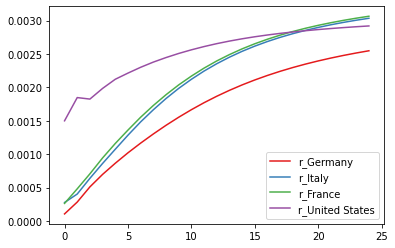

In [20]:
# Define the country and variable of the shock
shock = "r_United States"

# Define the countries and variables that should be in the IRF
country_choice = np.array(['Germany','Italy','France','United States'])
variable_choice = "r"

# Define the length of h
max_h = 24

perform_GIRF(max_h,shock,country_choice,variable_choice, F_l_dict)

# Period Analysis

In [207]:
def quick_perform_GIRF(df_dom_per, df_for_per, max_h,shock,country_choice,variable_choice,min_y_axis,max_y_axis):
    df_estimates = {}
    resid_dict = {}

    for country in country_list:
        # Define the chosen lag
        lag_x_it = 2
        lag_x_star = 1
        max_lag = max(lag_x_it,lag_x_star)

        x_it_star = pd.concat([df_dom_per[country],df_for_per[country]],axis=1)

        eigenvalues = statsmodels.tsa.vector_ar.vecm.coint_johansen(x_it_star,det_order=-1,k_ar_diff=max_lag-1).eig

        # Determine the rank of cointegration
        rank = np.sum(np.cumsum(eigenvalues) < 1)

        if (rank > k_i[country]):
            rank = k_i[country]

        coin_result = statsmodels.tsa.vector_ar.vecm.VECM(endog= df_dom_per[country][1:],exog=df_for_per[country].diff(1)[1:],exog_coint=df_for_per[country][1:],coint_rank=rank,k_ar_diff=max_lag-1).fit()

        # Initialize a dataframe with the x_star values of lag 0
        df_parameters = pd.concat([df_dom_per[country].shift(1),df_for_per[country].shift(1)], axis=1) @ np.vstack([coin_result.beta,coin_result.det_coef_coint])
        df_parameters.columns = ["_" + str(i) +"_coin" for i in range(coin_result.beta.shape[1])]

        # Initialize a dataframe with the x_star values of lag 0
        lagged_x_star = pd.concat([df_for_per[country].diff(1)],axis=1)
        lagged_x_star.columns += "_L0"
        df_parameters = pd.concat([df_parameters,lagged_x_star],axis=1)

        # Loop over all lag_x_it values to add the lagged values of x_it to df_parameters
        for lag in range(1,lag_x_it+1):
            if (lag <= lag_x_it-1):
                lagged_x_it = df_dom_per[country].diff(1).shift(lag)
                lagged_x_it.columns += "_dom_diff_L"+str(lag) 
                df_parameters = pd.concat([df_parameters,lagged_x_it], axis=1)

        # Loop over all lag_x_star values to add the lagged values of x_star to df_parameters
        for lag in range(1,lag_x_star+1):
            if (lag <= lag_x_star-1):
                lagged_x_star = df_for_per[country].diff(1).shift(lag)
                lagged_x_star.columns += "_for_diff_L"+str(lag) 
                df_parameters = pd.concat([df_parameters,lagged_x_star], axis=1)

        # Create and fit the model
        model = VAR(endog = df_dom_per[country].diff(1).iloc[max_lag:], exog = df_parameters.iloc[max_lag:])
        results = model.fit(maxlags=0,trend='ct',method='ols')

        df_estimate =  results.params.T.loc[:,["const","trend"]]

        selected_cols = [col for col in results.params.T.columns if col.endswith("L0")]
        new_df = results.params.T.loc[:,selected_cols]
        new_df.columns = [str(variable) + "_L0" for variable in for_variable_list if set_variables[country][variable]]
        df_estimate = pd.concat([df_estimate,new_df],axis=1)


        selected_cols = [col for col in results.params.T.columns if col.endswith("L1")]
        new_df = results.params.T.loc[:,selected_cols]
        new_df.columns = [str(variable) + "_dom_L2" for variable in dom_variable_list if set_variables[country][variable]]
        df_estimate = pd.concat([df_estimate,-new_df],axis=1)


        selected_cols = [col for col in df_estimate.columns if col.endswith("_L0")]
        A_0 = np.hstack([np.eye(k_i[country]),-df_estimate.loc[:,selected_cols]])

        selected_cols = [col for col in df_estimate.columns if col.endswith("_L2")]
        A_2 = np.hstack([df_estimate.loc[:,selected_cols],np.zeros((k_i[country],k_star[country]))])

        selected_cols = [col for col in results.params.T.columns if col.endswith("coin")] 
        new_df = results.params.T.loc[:,selected_cols] @ np.vstack([coin_result.beta,coin_result.det_coef_coint]).T
        new_df.columns = [str(variable) + "_dom_L1" for variable in dom_variable_list if set_variables[country][variable]] + [str(variable) + "_for_L1" for variable in for_variable_list if set_variables[country][variable]]
        df_estimate = pd.concat([df_estimate,new_df+A_0-A_2],axis=1)

        df_estimates[country] = df_estimate
        resid_dict[country] = results.resid

    # Stack all a_i0 parameters
    matrix_col = []
    for country in country_list:
        matrix_col.append(df_estimates[country].loc[:,"const"])
    a_0 = pd.concat(matrix_col)

    # Stack all a_i1 parameters
    matrix_col = []

    for country in country_list:
        matrix_col.append(df_estimates[country].loc[:,"trend"])
    a_1 = pd.concat(matrix_col)

    # Stack all residuals
    epsilon_t = pd.concat(resid_dict.values(), axis=1).T

    # Calculate the inverse of G_0
    G_0_inv = np.linalg.inv(create_G_j(0,df_estimates))

    # Create a dictionary for the values of F_l
    F_l_dict = {}

    # Fill dictionary by computing the values of F_l 
    for j in range(max_lag+1):
        F_l_dict[j] = G_0_inv @ create_G_j(j,df_estimates)
    
    # Get the index of the country and variable of the shock and define e_j
    e_j = np.zeros((k,1))
    e_j[np.where(dom_variables == shock)[0][0]] = 1
    
    # Compute Sigma
    Sigma = np.cov(epsilon_t)

    # Calculate the GIRF for every h
    girf_matrix = np.hstack([calculate_R_h(h, F_l_dict) @ G_0_inv @ Sigma @ e_j / np.sqrt(e_j.T @ Sigma @ e_j) for h in range(0,max_h+1)])
    
    fig, ax = plt.subplots()
    
    for continent in continent_list:
        weighted_GIRF = np.zeros(max_h+1)
        total_weights = 0
        
        continent_country_list = df_continent[continent].index
        for country in continent_country_list:
            if set_variables[country][variable_choice]:
                weighted_GIRF += girf_matrix[np.where(dom_variables == str(variable_choice)+"_"+str(country))[0][0]] * float(df_continent[continent].loc[country])
                total_weights += float(df_continent[continent].loc[country])
        
        weighted_GIRF = weighted_GIRF / total_weights
        
        min_y_axis = min(min_y_axis,np.min(weighted_GIRF))

        max_y_axis = max(max_y_axis,np.max(weighted_GIRF))
        
        i = 0
        
        if legend == True:
            sns.lineplot(x=np.arange(max_h+1),y=weighted_GIRF,label=continent)
            
            ax.set_xlabel("Horizon")
            ax.set_ylabel(ext_variable_list[i])
    
            pos = ax.get_position()
            ax.set_position([pos.x0, pos.y0, pos.width, pos.height])
            ax.legend(bbox_to_anchor=(1.065, 1.25),prop={'size':13},ncol=3)    
        else:
            sns.lineplot(x=np.arange(max_h+1),y=weighted_GIRF)
            ax.set_xlabel("Horizon")
            ax.set_ylabel(ext_variable_list[i])
            
    return fig, min_y_axis, max_y_axis
#     # Initialize an empty array for the index and names of the chosen countries and variables
#     index_array = []
#     name_array = []
    
#     # Loop over all chosen countries and variables and append to arrays
#     for country in country_choice:
#         if set_variables[country][variable_choice]:
#             name_array.append(str(variable_choice)+"_"+str(country))
#         np.where(dom_variables == shock)
        
#         if set_variables[country][variable_choice]:
#             index_array.append(np.where(dom_variables == str(variable_choice)+"_"+str(country))[0][0])
    
#     # Calculate the GIRF for every h
#     girf_matrix = np.hstack([calculate_R_h(h, F_l_dict) @ G_0_inv @ Sigma @ e_j / np.sqrt(e_j.T @ Sigma @ e_j) for h in range(0,max_h+1)])
    
#     # Plot all GIRF in a plot
#     for i in range(len(index_array)):
#         sns.lineplot(x=np.arange(max_h+1),y=girf_matrix[index_array[i]],label=name_array[i])
#     plt.plot()

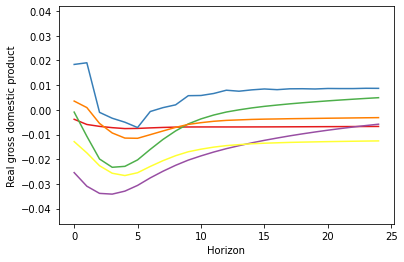

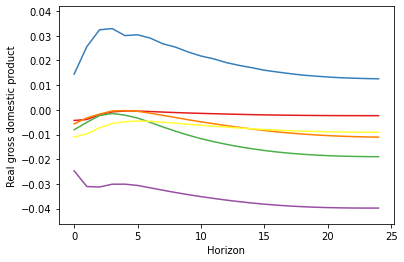

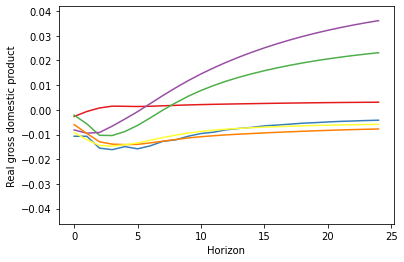

In [220]:
max_h =  24
shock = "r_Germany"
variable_choice = "eq"

legend = False

amount_of_periods = 3

periods = len(df_country["Australia"].index)
interval = np.round(np.arange(0,periods+1,periods / amount_of_periods))

figures = []

min_y_axis = 1000
max_y_axis = -1000

for time in range(amount_of_periods):

    df_period = {}
    df_dom_per = {}
    df_for_per = {}

    for country in country_list:
        df_period[country] = df_country[country].iloc[int(interval[int(time)]):int(interval[int(time+1)])]
        
        domestic_cols = [col for col in df_period[country].columns if not col.endswith("s")]
        df_dom_per[country] = df_period[country].loc[:,domestic_cols]

        foreign_cols = [col for col in df_period[country].columns if col.endswith("s")]
        df_for_per[country] = df_period[country].loc[:,foreign_cols]

    fig, min_y_axis, max_y_axis = quick_perform_GIRF(df_dom_per, df_for_per, max_h,shock,country_choice,variable_choice,min_y_axis,max_y_axis)
    figures.append(fig)
    
for fig in figures:
    ax = fig.gca()
    ax.set_ylim(min_y_axis*1.16,max_y_axis*1.16)

# VECM

In [165]:
def perform_VECM_plot(df_dom_per,df_for_per,dep_variable_choice,ind_variable_choice,country):
    
    # Define the chosen lag
    lag_x_it = 2
    lag_x_star = 1
    max_lag = max(lag_x_it,lag_x_star)

    x_it_star = pd.concat([df_dom_per[country],df_for_per[country]],axis=1)

    eigenvalues = statsmodels.tsa.vector_ar.vecm.coint_johansen(x_it_star,det_order=-1,k_ar_diff=max_lag-1).eig

    # Determine the rank of cointegration
    rank = np.sum(np.cumsum(eigenvalues) < 1)

    if (rank > k_i[country]):
        rank = k_i[country]

    coin_result = statsmodels.tsa.vector_ar.vecm.VECM(endog= df_dom_per[country][1:],exog=df_for_per[country].diff(1)[1:],exog_coint=df_for_per[country][1:],coint_rank=rank,k_ar_diff=max_lag-1).fit()

    # Initialize a dataframe with the x_star values of lag 0
    df_parameters = pd.concat([df_dom_per[country].shift(1),df_for_per[country].shift(1)], axis=1) @ np.vstack([coin_result.beta,coin_result.det_coef_coint])
    df_parameters.columns = ["_" + str(i) +"_coin" for i in range(coin_result.beta.shape[1])]

    # Initialize a dataframe with the x_star values of lag 0
    lagged_x_star = pd.concat([df_for_per[country].diff(1)],axis=1)
    lagged_x_star.columns += "_L0"
    df_parameters = pd.concat([df_parameters,lagged_x_star],axis=1)

    # Loop over all lag_x_it values to add the lagged values of x_it to df_parameters
    for lag in range(1,lag_x_it+1):
        if (lag <= lag_x_it-1):
            lagged_x_it = df_dom_per[country].diff(1).shift(lag)
            lagged_x_it.columns += "_dom_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_it], axis=1)

    # Loop over all lag_x_star values to add the lagged values of x_star to df_parameters
    for lag in range(1,lag_x_star+1):
        if (lag <= lag_x_star-1):
            lagged_x_star = df_for_per[country].diff(1).shift(lag)
            lagged_x_star.columns += "_for_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_star], axis=1)

    # Create and fit the model
    model = VAR(endog = df_dom_per[country].diff(1).iloc[max_lag:], exog = df_parameters.iloc[max_lag:])
    results = model.fit(maxlags=0,trend='ct',method='ols')

    parameter = results.params.T[ind_variable_choice].loc[dep_variable_choice]
    lower_bound = parameter - results.bse.T[ind_variable_choice].loc[dep_variable_choice] * 1.96
    upper_bound = parameter + results.bse.T[ind_variable_choice].loc[dep_variable_choice] * 1.96
    return (parameter,lower_bound,upper_bound)

Dependent variable: y
Independent variable: ys_L0
0.008643154983775972


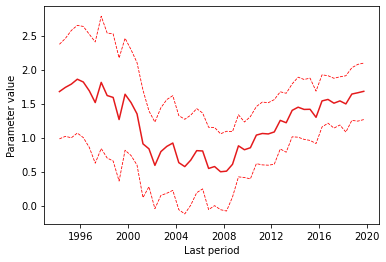

Dependent variable: Dp
Independent variable: Dps_L0
2.812191454431329


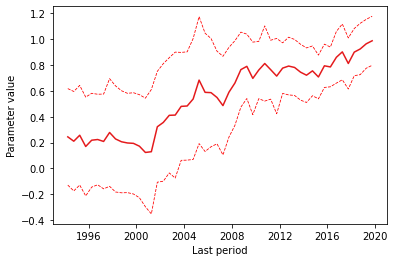

Dependent variable: eq
Independent variable: eqs_L0
1.9590698454369642


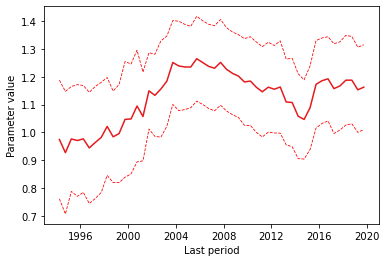

Dependent variable: r
Independent variable: rs_L0
1.5493664824655262


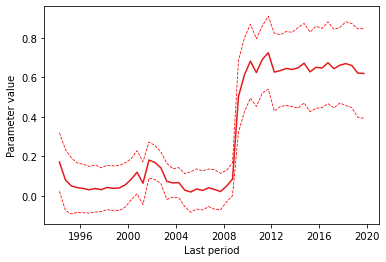

Dependent variable: lr
Independent variable: lrs_L0
-1.5407773960473845


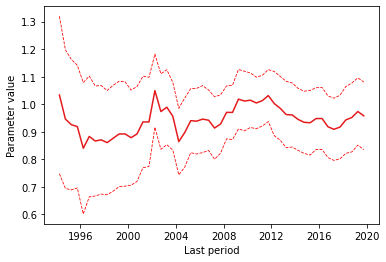

In [177]:
country_choice = "Germany"

periods = len(df_country["Australia"].index)
period_len = 60
steps = 2

dep_var_array = []
ind_var_array = []

for dom_variable in dom_variable_list:
    if set_variables[country_choice][dom_variable]:
        if set_variables[country_choice][dom_variable+"s"]:
            dep_var_array.append(dom_variable)
            ind_var_array.append(dom_variable+"s_L0")
            

for dep_variable_choice in dep_var_array:

    print("Dependent variable:",dep_variable_choice)
    print("Independent variable:",dep_variable_choice+"s_L0")

    years = []
    parameters = []
    lower_bounds = []
    upper_bounds = []


    for time in np.arange(0,periods-period_len,steps):

        df_period = {}
        df_dom_per = {}
        df_for_per = {}

        for country in country_list:
            df_period[country] = df_country[country].iloc[time:period_len+time]

            domestic_cols = [col for col in df_period[country].columns if not col.endswith("s")]
            df_dom_per[country] = df_period[country].loc[:,domestic_cols]

            foreign_cols = [col for col in df_period[country].columns if col.endswith("s")]
            df_for_per[country] = df_period[country].loc[:,foreign_cols]

        years.append(df_period[country].index[-1])

        VECM_result = perform_VECM_plot(df_dom_per,df_for_per,dep_variable_choice,dep_variable_choice+"s_L0",country_choice)

        parameters.append(VECM_result[0])
        lower_bounds.append(VECM_result[1])
        upper_bounds.append(VECM_result[2])

    sns.lineplot(x=years,y=parameters)
    sns.lineplot(x=years,y=lower_bounds,linestyle="--",color='r',linewidth=0.8)
    sns.lineplot(x=years,y=upper_bounds,linestyle="--",color='r',linewidth=0.8)
    plt.xlabel("Last period")
    plt.ylabel("Parameter value")
    plt.show()

In [95]:
def perform_VECM(df_dom_per,df_for_per,dep_variable_choice,ind_variable_choice,country):
    
    # Define the chosen lag
    lag_x_it = 2
    lag_x_star = 1
    max_lag = max(lag_x_it,lag_x_star)

    x_it_star = pd.concat([df_dom_per[country],df_for_per[country]],axis=1)

    eigenvalues = statsmodels.tsa.vector_ar.vecm.coint_johansen(x_it_star,det_order=-1,k_ar_diff=max_lag-1).eig

    # Determine the rank of cointegration
    rank = np.sum(np.cumsum(eigenvalues) < 1)

    if (rank > k_i[country]):
        rank = k_i[country]

    coin_result = statsmodels.tsa.vector_ar.vecm.VECM(endog= df_dom_per[country][1:],exog=df_for_per[country].diff(1)[1:],exog_coint=df_for_per[country][1:],coint_rank=rank,k_ar_diff=max_lag-1).fit()

    # Initialize a dataframe with the x_star values of lag 0
    df_parameters = pd.concat([df_dom_per[country].shift(1),df_for_per[country].shift(1)], axis=1) @ np.vstack([coin_result.beta,coin_result.det_coef_coint])
    df_parameters.columns = ["_" + str(i) +"_coin" for i in range(coin_result.beta.shape[1])]

    # Initialize a dataframe with the x_star values of lag 0
    lagged_x_star = pd.concat([df_for_per[country].diff(1)],axis=1)
    lagged_x_star.columns += "_L0"
    df_parameters = pd.concat([df_parameters,lagged_x_star],axis=1)

    # Loop over all lag_x_it values to add the lagged values of x_it to df_parameters
    for lag in range(1,lag_x_it+1):
        if (lag <= lag_x_it-1):
            lagged_x_it = df_dom_per[country].diff(1).shift(lag)
            lagged_x_it.columns += "_dom_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_it], axis=1)

    # Loop over all lag_x_star values to add the lagged values of x_star to df_parameters
    for lag in range(1,lag_x_star+1):
        if (lag <= lag_x_star-1):
            lagged_x_star = df_for_per[country].diff(1).shift(lag)
            lagged_x_star.columns += "_for_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_star], axis=1)

    # Create and fit the model
    model = VAR(endog = df_dom_per[country].diff(1).iloc[max_lag:], exog = df_parameters.iloc[max_lag:])
    results = model.fit(maxlags=0,trend='ct',method='ols')
    
    df_estimate =  results.params.T.loc[:,["const","trend"]]

    selected_cols = [col for col in results.params.T.columns if col.endswith("L0")]
    new_df = results.params.T.loc[:,selected_cols]
    new_df.columns = [str(variable) + "_L0" for variable in for_variable_list if set_variables[country][variable]]
    df_estimate = pd.concat([df_estimate,new_df],axis=1)


    selected_cols = [col for col in results.params.T.columns if col.endswith("L1")]
    new_df = results.params.T.loc[:,selected_cols]
    new_df.columns = [str(variable) + "_dom_L2" for variable in dom_variable_list if set_variables[country][variable]]
    df_estimate = pd.concat([df_estimate,-new_df],axis=1)


    selected_cols = [col for col in df_estimate.columns if col.endswith("_L0")]
    A_0 = np.hstack([np.eye(k_i[country]),-df_estimate.loc[:,selected_cols]])

    selected_cols = [col for col in df_estimate.columns if col.endswith("_L2")]
    A_2 = np.hstack([df_estimate.loc[:,selected_cols],np.zeros((k_i[country],k_star[country]))])

    selected_cols = [col for col in results.params.T.columns if col.endswith("coin")] 
    new_df = results.params.T.loc[:,selected_cols] @ np.vstack([coin_result.beta,coin_result.det_coef_coint]).T
    new_df.columns = [str(variable) + "_dom_L1" for variable in dom_variable_list if set_variables[country][variable]] + [str(variable) + "_for_L1" for variable in for_variable_list if set_variables[country][variable]]
    df_estimate = pd.concat([df_estimate,new_df+A_0-A_2],axis=1)
    
    return df_estimate[ind_variable_choice].loc[dep_variable_choice]

In [176]:
country_choice = "United States"
periods = len(df_country["Australia"].index)
period_len = 60
steps = 102

statistics = []

for country_choice in country_list:
    dep_var_array = []
    ind_var_array = []

    for dom_variable in dom_variable_list:
        if set_variables[country_choice][dom_variable]:
            dep_var_array.append(dom_variable)

#     for for_variable in for_variable_list:
#         if set_variables[country_choice][for_variable]:
#             ind_var_array.append(for_variable+"_L0")

    for dom_variable in dom_variable_list:
        if set_variables[country_choice][dom_variable]:
            ind_var_array.append(dom_variable+"_dom_L1")
        
    for dep_variable_choice in dep_var_array:
        for ind_variable_choice in ind_var_array:

            years = []
            parameters = []
            lower_bounds = []
            upper_bounds = []


            for time in np.arange(0,periods-period_len,steps):
                df_period = {}
                df_dom_per = {}
                df_for_per = {}

                for country in country_list:
                    df_period[country] = df_country[country].iloc[time:period_len+time]

                    domestic_cols = [col for col in df_period[country].columns if not col.endswith("s")]
                    df_dom_per[country] = df_period[country].loc[:,domestic_cols]

                    foreign_cols = [col for col in df_period[country].columns if col.endswith("s")]
                    df_for_per[country] = df_period[country].loc[:,foreign_cols]

                years.append(df_period[country].index[-1])

                VECM_result = perform_VECM(df_dom_per,df_for_per,dep_variable_choice,ind_variable_choice,country_choice)

                parameters.append(VECM_result)

            statistics.append((np.absolute(parameters[-1])-np.absolute(parameters[0]))/np.absolute(parameters[0]))

quantile_array = [0.05,0.1,0.25,0.5,0.75,0.9,0.95]
for quantile in quantile_array:
    print(str(quantile)+" -> ",np.quantile(statistics,quantile))

Argentina
Australia
Austria
Belgium
Brazil
Canada
China
Chile
Finland
France
Germany
India
Indonesia
Italy
Japan
Korea
Malaysia
Mexico
Netherlands
Norway
New Zealand
Peru
Philippines
South Africa
Saudi Arabia
Singapore
Spain
Sweden
Switzerland
Thailand
Turkey
United Kingdom
United States
0.05 ->  -0.9545388594811669
0.1 ->  -0.9012179518877302
0.25 ->  -0.6433403355765083
0.5 ->  -0.06663373323713548
0.75 ->  1.6469858878350767
0.9 ->  7.0140883821134095
0.95 ->  15.070735347835807


In [178]:
def perform_VECM_plot(df_dom_per,df_for_per,dep_variable_choice,ind_variable_choice,country):
    
    # Define the chosen lag
    lag_x_it = 2
    lag_x_star = 1
    max_lag = max(lag_x_it,lag_x_star)

    x_it_star = pd.concat([df_dom_per[country],df_for_per[country]],axis=1)

    eigenvalues = statsmodels.tsa.vector_ar.vecm.coint_johansen(x_it_star,det_order=-1,k_ar_diff=max_lag-1).eig

    # Determine the rank of cointegration
    rank = np.sum(np.cumsum(eigenvalues) < 1)

    if (rank > k_i[country]):
        rank = k_i[country]

    coin_result = statsmodels.tsa.vector_ar.vecm.VECM(endog= df_dom_per[country][1:],exog=df_for_per[country].diff(1)[1:],exog_coint=df_for_per[country][1:],coint_rank=rank,k_ar_diff=max_lag-1).fit()

    # Initialize a dataframe with the x_star values of lag 0
    df_parameters = pd.concat([df_dom_per[country].shift(1),df_for_per[country].shift(1)], axis=1) @ np.vstack([coin_result.beta,coin_result.det_coef_coint])
    df_parameters.columns = ["_" + str(i) +"_coin" for i in range(coin_result.beta.shape[1])]

    # Initialize a dataframe with the x_star values of lag 0
    lagged_x_star = pd.concat([df_for_per[country].diff(1)],axis=1)
    lagged_x_star.columns += "_L0"
    df_parameters = pd.concat([df_parameters,lagged_x_star],axis=1)

    # Loop over all lag_x_it values to add the lagged values of x_it to df_parameters
    for lag in range(1,lag_x_it+1):
        if (lag <= lag_x_it-1):
            lagged_x_it = df_dom_per[country].diff(1).shift(lag)
            lagged_x_it.columns += "_dom_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_it], axis=1)

    # Loop over all lag_x_star values to add the lagged values of x_star to df_parameters
    for lag in range(1,lag_x_star+1):
        if (lag <= lag_x_star-1):
            lagged_x_star = df_for_per[country].diff(1).shift(lag)
            lagged_x_star.columns += "_for_diff_L"+str(lag) 
            df_parameters = pd.concat([df_parameters,lagged_x_star], axis=1)

    # Create and fit the model
    model = VAR(endog = df_dom_per[country].diff(1).iloc[max_lag:], exog = df_parameters.iloc[max_lag:])
    results = model.fit(maxlags=0,trend='ct',method='ols')

    parameter = np.linalg.det(results.params.T[ind_variable_choice].loc[dep_variable_choice])

#     lower_bound = parameter - results.bse.T[ind_variable_choice].loc[dep_variable_choice] * 1.96
#     upper_bound = parameter + results.bse.T[ind_variable_choice].loc[dep_variable_choice] * 1.96
    return parameter

end of code